![alt text](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png "MSE Logo") 
![alt text](https://www.hes-so.ch/typo3conf/ext/wng_site/Resources/Public/HES-SO/img/logo_hesso_master_tablet.svg "Hes Logo")

# Auteur : Abdi VURAL
## L'objectif
Création d'un algorithme de clustering pour analyser les données météorologiques en Suisse. Ce travail a pour objectif d'identifier les relations entre les différentes données afin de fournir une perspective globale.

<span style="color: Green; font-size: 24px;bold"> A. Préparation des données : </span>
Chargement des données et création de colonnes temporelles pour faciliter la segmentation des données.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data_path = "C:/Users/Abdi/Desktop/PA/data/raw/meteo_idaweb.csv"
data = pd.read_csv(data_path)


data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711680 entries, 0 to 4711679
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   stn            object 
 1   xchills0       float64
 2   gre000z0       float64
 3   prestas0       float64
 4   tre200s0       float64
 5   rre150z0       float64
 6   ure200s0       float64
 7   sre000z0       float64
 8   fu3010z0       float64
 9   dkl010z0       float64
 10  year           float64
 11  day_of_year    int64  
 12  minute_of_day  int64  
 13  name           object 
 14  longitude      float64
 15  latitude       float64
 16  km_longitude   float64
 17  km_latitude    float64
 18  altitude       float64
dtypes: float64(15), int64(2), object(2)
memory usage: 683.0+ MB


(None,
    stn  xchills0  gre000z0  prestas0  tre200s0  rre150z0  ure200s0  sre000z0  \
 0  ABO       2.7       3.0     879.1       2.7       0.0      55.9       0.0   
 1  ABO       2.1       4.0     879.0       2.1       0.0      56.0       0.0   
 2  ABO       3.4       3.0     878.9       3.4       0.0      52.7       0.0   
 3  ABO       2.5       2.0     878.8       2.5       0.0      55.5       0.0   
 4  ABO       2.3       2.0     878.6       2.3       0.0      56.6       0.0   
 
    fu3010z0  dkl010z0    year  day_of_year  minute_of_day       name  \
 0       2.2     228.0  2020.0            1              0  Adelboden   
 1       2.2     355.0  2020.0            1             10  Adelboden   
 2       3.6     225.0  2020.0            1             20  Adelboden   
 3       2.5       4.0  2020.0            1             30  Adelboden   
 4       4.3     262.0  2020.0            1             40  Adelboden   
 
    longitude  latitude  km_longitude  km_latitude  altitude  
 0

<span style="color: Green; font-size: 24px;bold"> Création de la colonne des heures</span>

In [3]:

data['hour_of_day'] = (data['minute_of_day'] // 60)
data[['minute_of_day', 'hour_of_day']].head()


minute_of_day  hour_of_day
0              0            0
1             10            0
2             20            0
3             30            0
4             40            0

<span style="color: Green; font-size: 24px;bold">Création de la colonne de mois et jour </span>

In [4]:
from datetime import datetime, timedelta

def day_of_year_to_date(year, day_of_year):
    date = datetime(year=int(year), month=1, day=1) + timedelta(days=day_of_year - 1)
    return date.strftime('%m-%d')

data['month_day'] = data.apply(lambda row: day_of_year_to_date(row['year'], row['day_of_year']), axis=1)
data[['year', 'day_of_year', 'month_day']].head()


year  day_of_year month_day
0  2020.0            1     01-01
1  2020.0            1     01-01
2  2020.0            1     01-01
3  2020.0            1     01-01
4  2020.0            1     01-01

<span style="color: Green; font-size: 24px;bold"> Création de la colonne de date en format dd/mm/yy </span>

In [6]:

def day_of_year_to_full_date(year, day_of_year):
    date = datetime(year=int(year), month=1, day=1) + timedelta(days=day_of_year - 1)
    return date.strftime('%d/%m/%y')

data['date_ddmmyy'] = data.apply(lambda row: day_of_year_to_full_date(row['year'], row['day_of_year']), axis=1)
data[['year', 'day_of_year', 'date_ddmmyy']].head()


year  day_of_year date_ddmmyy
0  2020.0            1    01/01/20
1  2020.0            1    01/01/20
2  2020.0            1    01/01/20
3  2020.0            1    01/01/20
4  2020.0            1    01/01/20

In [7]:
# List all columns in the dataset
data.columns.tolist()


['stn',
 'xchills0',
 'gre000z0',
 'prestas0',
 'tre200s0',
 'rre150z0',
 'ure200s0',
 'sre000z0',
 'fu3010z0',
 'dkl010z0',
 'year',
 'day_of_year',
 'minute_of_day',
 'name',
 'longitude',
 'latitude',
 'km_longitude',
 'km_latitude',
 'altitude',
 'hour_of_day',
 'month_day',
 'date_ddmmyy']

<span style="color: Green; font-size: 24px;bold">Modifications des intitulés des colonnes pour les rendre plus compréhensibles </span>

In [8]:
# Renaming columns based on the proposed mapping
data_renamed = data.rename(columns={
    'stn': 'station_code',
    'xchills0': 'wind_chill',
    'gre000z0': 'solar_radiation',
    'prestas0': 'atmospheric_pressure',
    'tre200s0': 'temperature_2m',
    'rre150z0': 'precipitation_1h',
    'ure200s0': 'humidity_2m',
    'sre000z0': 'snow_depth',
    'fu3010z0': 'wind_speed_10m',
    'dkl010z0': 'wind_direction_10m',
    'name': 'station_name',
    'km_longitude': 'longitude_km',
    'km_latitude': 'latitude_km',
    'hour_of_day': 'hour',
    'date_ddmmyy': 'date'
})

data_renamed.head()


station_code  wind_chill  solar_radiation  atmospheric_pressure  \
0          ABO         2.7              3.0                 879.1   
1          ABO         2.1              4.0                 879.0   
2          ABO         3.4              3.0                 878.9   
3          ABO         2.5              2.0                 878.8   
4          ABO         2.3              2.0                 878.6   

   temperature_2m  precipitation_1h  humidity_2m  snow_depth  wind_speed_10m  \
0             2.7               0.0         55.9         0.0             2.2   
1             2.1               0.0         56.0         0.0             2.2   
2             3.4               0.0         52.7         0.0             3.6   
3             2.5               0.0         55.5         0.0             2.5   
4             2.3               0.0         56.6         0.0             4.3   

   wind_direction_10m  ...  minute_of_day  station_name  longitude latitude  \
0               228.0  ...              0     Adelboden   7.566667     46.5   
1               355.0  ...             10     Adelboden   7.566667     46.5   
2               225.0  ...             20     Adelboden   7.566667     46.5   
3                 4.0  ...             30     Adelboden   7.566667     46.5   
4               262.0  ...             40     Adelboden   7.566667     46.5   

   longitude_km  latitude_km  altitude  hour  month_day      date  
0      609372.0     148939.0    1321.0     0      01-01  01/01/20  
1      609372.0     148939.0    1321.0     0      01-01  01/01/20  
2      609372.0     148939.0    1321.0     0      01-01  01/01/20  
3      609372.0     148939.0    1321.0     0      01-01  01/01/20  
4      609372.0     148939.0    1321.0     0      01-01  01/01/20  

[5 rows x 22 columns]

In [9]:

unique_stations = data_renamed['station_name'].unique()
unique_stations


array(['Adelboden', 'Altdorf', 'Basel / Binningen', 'Bern / Zollikofen',
       'Buchs / Aarau', 'La Chaux-de-Fonds', 'Chur', 'Davos', 'Delémont',
       'Disentis', 'Engelberg', 'Evionnaz', 'Glarus', 'Genève / Cointrin',
       'Interlaken', 'Lugano', 'Luzern', 'Mathod', 'Le Moléson',
       'Neuchâtel', 'Locarno / Monti', 'Piotta', 'Pully', 'Samedan',
       'Schaffhausen', 'Sion', 'Zürich / Fluntern', 'St. Gallen', 'Visp',
       'Zermatt'], dtype=object)

<span style="color: green; font-size: 24px;bold"> Filtrage des données en sélectionnant une ville spécifique </span>

In [10]:

andeer_data = data_renamed[data_renamed['station_name'] == 'Sion']
average_temperature_by_hour = andeer_data.groupby('hour')['temperature_2m'].mean().reset_index()
average_temperature_by_hour.head(24)


hour  temperature_2m
0      0        8.347108
1      1        7.948828
2      2        7.606712
3      3        7.338737
4      4        7.196986
5      5        7.554810
6      6        8.324810
7      7        9.451887
8      8       10.821507
9      9       12.363775
10    10       13.945205
11    11       15.250609
12    12       16.174201
13    13       16.682892
14    14       16.667397
15    15       16.048402
16    16       14.955571
17    17       13.692009
18    18       12.539452
19    19       11.623912
20    20       10.807945
21    21       10.060167
22    22        9.404049
23    23        8.849269

<span style="color: Green; font-size: 24px;bold"> Vérification des colonnes et des noms des villes</span>

In [11]:

unique_stations = data_renamed['station_name'].unique()
unique_stations

array(['Adelboden', 'Altdorf', 'Basel / Binningen', 'Bern / Zollikofen',
       'Buchs / Aarau', 'La Chaux-de-Fonds', 'Chur', 'Davos', 'Delémont',
       'Disentis', 'Engelberg', 'Evionnaz', 'Glarus', 'Genève / Cointrin',
       'Interlaken', 'Lugano', 'Luzern', 'Mathod', 'Le Moléson',
       'Neuchâtel', 'Locarno / Monti', 'Piotta', 'Pully', 'Samedan',
       'Schaffhausen', 'Sion', 'Zürich / Fluntern', 'St. Gallen', 'Visp',
       'Zermatt'], dtype=object)

In [12]:
data.columns

Index(['stn', 'xchills0', 'gre000z0', 'prestas0', 'tre200s0', 'rre150z0',
       'ure200s0', 'sre000z0', 'fu3010z0', 'dkl010z0', 'year', 'day_of_year',
       'minute_of_day', 'name', 'longitude', 'latitude', 'km_longitude',
       'km_latitude', 'altitude', 'hour_of_day', 'month_day', 'date_ddmmyy'],
      dtype='object')

In [13]:
data_renamed.head()


station_code  wind_chill  solar_radiation  atmospheric_pressure  \
0          ABO         2.7              3.0                 879.1   
1          ABO         2.1              4.0                 879.0   
2          ABO         3.4              3.0                 878.9   
3          ABO         2.5              2.0                 878.8   
4          ABO         2.3              2.0                 878.6   

   temperature_2m  precipitation_1h  humidity_2m  snow_depth  wind_speed_10m  \
0             2.7               0.0         55.9         0.0             2.2   
1             2.1               0.0         56.0         0.0             2.2   
2             3.4               0.0         52.7         0.0             3.6   
3             2.5               0.0         55.5         0.0             2.5   
4             2.3               0.0         56.6         0.0             4.3   

   wind_direction_10m  ...  minute_of_day  station_name  longitude latitude  \
0               228.0  ...              0     Adelboden   7.566667     46.5   
1               355.0  ...             10     Adelboden   7.566667     46.5   
2               225.0  ...             20     Adelboden   7.566667     46.5   
3                 4.0  ...             30     Adelboden   7.566667     46.5   
4               262.0  ...             40     Adelboden   7.566667     46.5   

   longitude_km  latitude_km  altitude  hour  month_day      date  
0      609372.0     148939.0    1321.0     0      01-01  01/01/20  
1      609372.0     148939.0    1321.0     0      01-01  01/01/20  
2      609372.0     148939.0    1321.0     0      01-01  01/01/20  
3      609372.0     148939.0    1321.0     0      01-01  01/01/20  
4      609372.0     148939.0    1321.0     0      01-01  01/01/20  

[5 rows x 22 columns]

<span style="color: Green; font-size: 24px;bold">B.Clustering</span><br>
Objectif : Regrouper les données en fonction des similitudes ou des relations qu'elles partagent.<br>
La section de clustering se compose de deux parties : Partie 1: Classification de séries temporelles avec tslearn , Partie 2: Classification des évolutions des variables à un moment donné

<span style="text-align:center;color: Aqua; font-size: 34px;bold; ">Partie 1 : Clustering de séries temporelles avec Tslearn</span><br>
Cette section est dédiée à l'analyse des dynamiques des variables telles que la température, l'humidité et les précipitations. L'outil tslearn est utilisé pour comprendre comment ces variables évoluent au fil du temps<br>

<span style="color: Green; font-size: 24px;bold">La dynamique de changement de temperature </span><br>
L'objectif est de montrer le changement de temperature sur une journée pendant l'année de 2020<br>

C:\Users\Abdi\AppData\Local\Temp\ipykernel_10028\600840092.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sion_2020['day'] = data_sion_2020['date'].dt.date


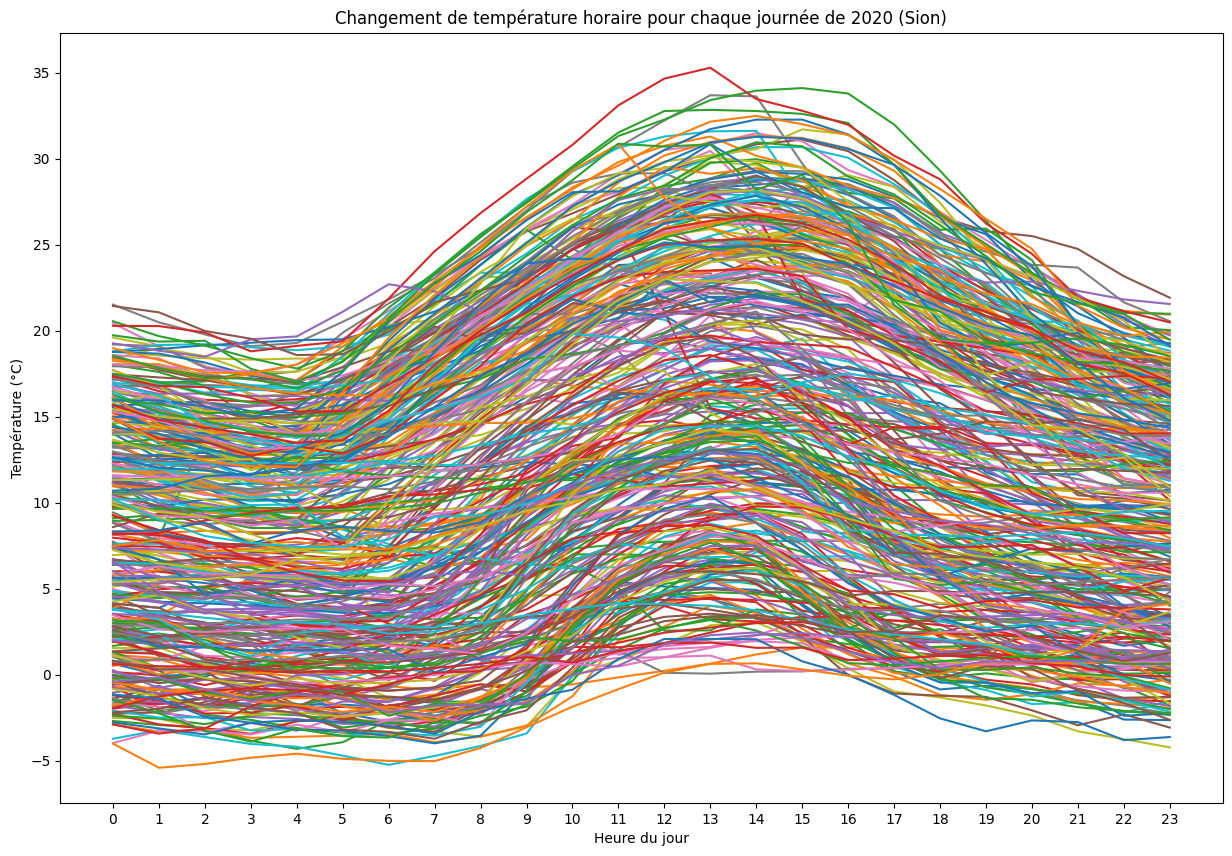

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

data_renamed['date'] = pd.to_datetime(data_renamed['date'])

# Filtrer les données pour Sion et pour l'année 2020
data_sion_2020 = data_renamed[(data_renamed['station_name'] == 'Sion') & (data_renamed['date'].dt.year == 2020)]

# Extraire le jour à partir de la colonne 'date' pour le regroupement
data_sion_2020['day'] = data_sion_2020['date'].dt.date

# Grouper les données par jour et par heure et calculer la moyenne pour chaque heure
grouped = data_sion_2020.groupby(['day', 'hour'])['temperature_2m'].mean().reset_index()

# Pivoter les données pour faciliter le tracé
pivot_data = grouped.pivot(index='day', columns='hour', values='temperature_2m')

plt.figure(figsize=(15, 10))
for day, row in pivot_data.iterrows():
    plt.plot(range(24), row, label=f'{day}')

plt.title('Changement de température horaire pour chaque journée de 2020 (Sion)')
plt.xlabel('Heure du jour')
plt.ylabel('Température (°C)')
plt.xticks(range(24))  
plt.show()


Chaque courbe représente les températures moyennes horaires pour la ville de Sion

In [62]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans

time_series_data = to_time_series_dataset(pivot_data.fillna(method='ffill').values)


C:\Users\Abdi\AppData\Local\Temp\ipykernel_10028\2537609370.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = to_time_series_dataset(pivot_data.fillna(method='ffill').values)


In [63]:
# Définir le modèle de clustering
n_clusters = 4 
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=33)
labels = model.fit_predict(time_series_data)

# Afficher les étiquettes des clusters pour chaque série temporelle
print("Labels des clusters:", labels)


Labels des clusters: [0 2 2 2 2 3 1 1 3 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 3 1
 1 1 3 3 3 0 0 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 1 3 3 3 2 3 0 2 2
 2 2 2 3 3 3 3 2 2 2 0 2 2 3 2 2 2 0 2 2 2 3 3 1 3 3 3 2 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 0 0 0 3 3 3 1 3 1 2 2 0 3 3 3 3 3 3 1 1 1 1 3 3 3 3 3
 3 3 3 3 0 0 2 3 3 3 1 1 3 2 2 0 3 3 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 1 0 0 2
 3 3 3 1 1 3 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 3 3 3 1 1 3
 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 3 3 3 0 2 2 3 1 3 1 1 1 2 2 0 1 1 1
 1 1 1 3 1 3 3 3 3 2 2 2 2 2 3 0 2 0 3 1 3 1 1 1 2 2 0 2 2 2 2 2 2 2 2 3 3
 3 2 2 2 2 2 2 2 2 0 2 2 3 3 3 1 1 1 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 2 2 3 2 3 1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0]


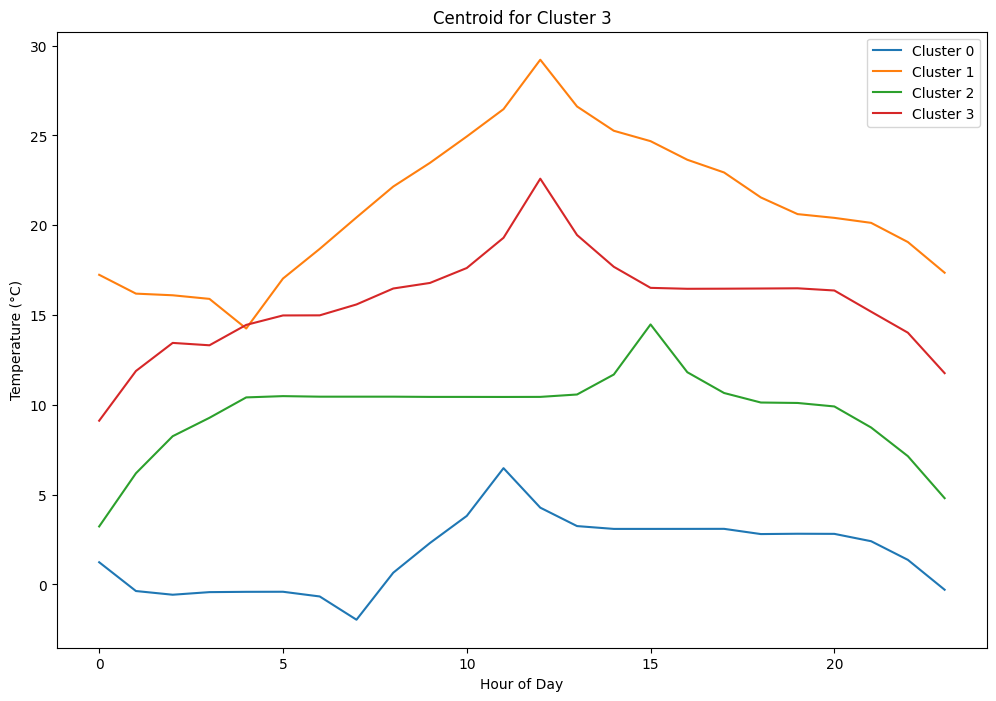

In [64]:
import matplotlib.pyplot as plt

# Afficher les centroids des clusters
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.plot(model.cluster_centers_[i].ravel(), label=f'Cluster {i}')
    plt.title(f'Centroid for Cluster {i}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Temperature (°C)')

plt.legend()
plt.show()


Ce graph permet de comprendre comment les températures varient typiquement tout au long de la journée pour différents types de jours météorologiques à Sion en 2020. Chaque cluster peut révéler un type différent de dynamique diurne, comme des jours plus chauds, des jours plus froids, ou des jours avec des changements de température importants.

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

372.518 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.0s


294.680 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.0s


288.213 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


286.547 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


286.116 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


285.798 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


285.476 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


285.357 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


285.159 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


284.907 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


284.347 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.5s


283.752 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s


283.711 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.4s


282.333 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


282.074 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


282.074 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s


Labels des clusters : [0 3 3 0 0 0 0 3 3 3 3 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0
 0 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2
 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 3 0 0 0 3 3 0 3 3 0
 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 1 1 1 1 3 1 1 1 1 3 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 3 3 1 1 1 1 1
 3 1 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 0 3 3 3 3]


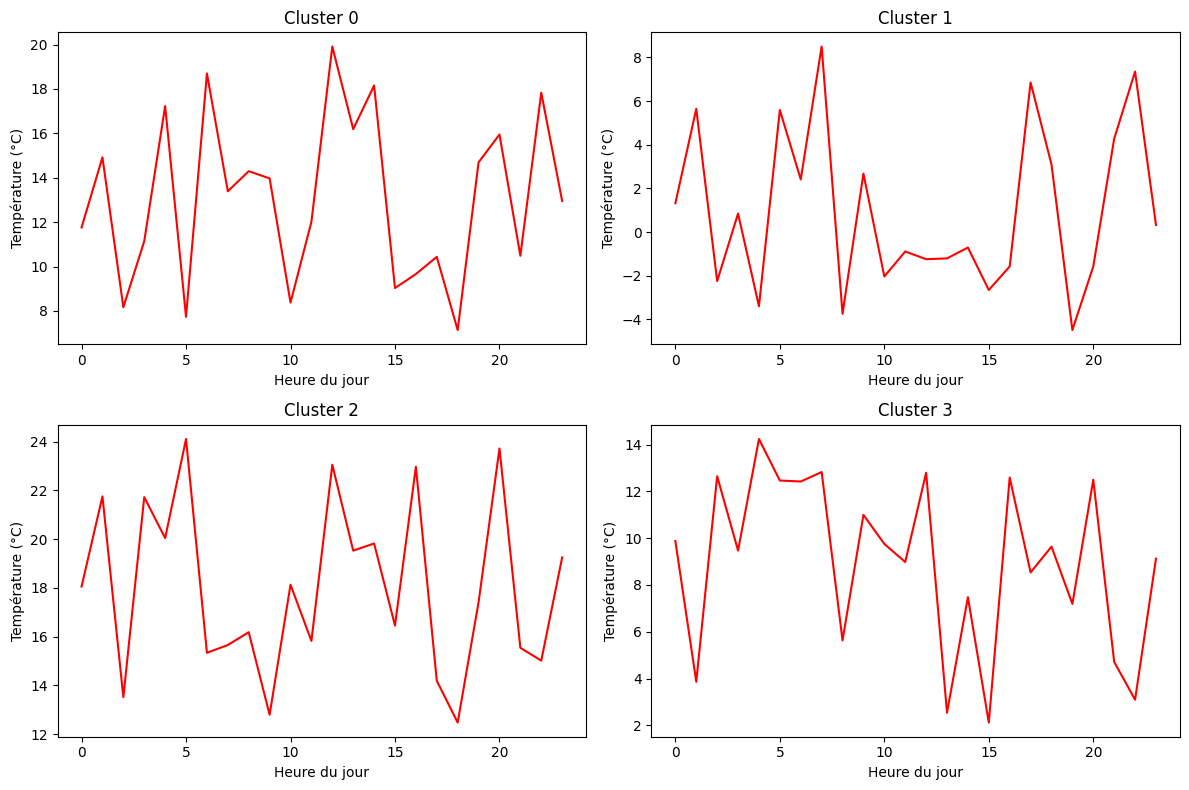

In [65]:
import pandas as pd
import numpy as np
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt

np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=366 * 24, freq='H')
temperatures = np.random.normal(loc=10, scale=5, size=366 * 24) 

data_sion = pd.DataFrame({
    'date': dates,
    'temperature_2m': temperatures + 10 * np.sin(np.linspace(0, 24, 366 * 24) * np.pi / 12)  # Variation diurne
})
data_sion['day'] = data_sion['date'].dt.date

daily_temperatures = data_sion.groupby('day')['temperature_2m'].apply(list)

# Convertir en un ensemble de données de série temporelle pour tslearn
formatted_dataset = to_time_series_dataset(list(daily_temperatures))
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", verbose=True, random_state=33)
labels = model.fit_predict(formatted_dataset)
print("Labels des clusters :", labels)
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(model.cluster_centers_[i].ravel(), "r-")
    plt.title(f"Cluster {i}")
    plt.xlabel("Heure du jour")
    plt.ylabel("Température (°C)")
plt.tight_layout()
plt.show()


<br>-Cluster 0  représente des jours où la température reste relativement élevée,ce qui pourrait être typique d'une journée chaude et stable.
<br>-Cluster 1 montre des températures modérées avec des pics et des creux plus marqués
<br>-Cluster 2 semble illustrer des jours où la température reste plus constante et relativement plus basse, ce qui pourrait caractériser une journée froide.
<br>-Cluster 3 a des températures encore plus basses et une grande variabilité, peut-être des jours de transition entre des périodes climatiques ou des jours avec des événements météorologiques particuliers.

C:\Users\Abdi\AppData\Local\Temp\ipykernel_10028\2580619073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sion_2020['day'] = data_sion_2020['date'].dt.date


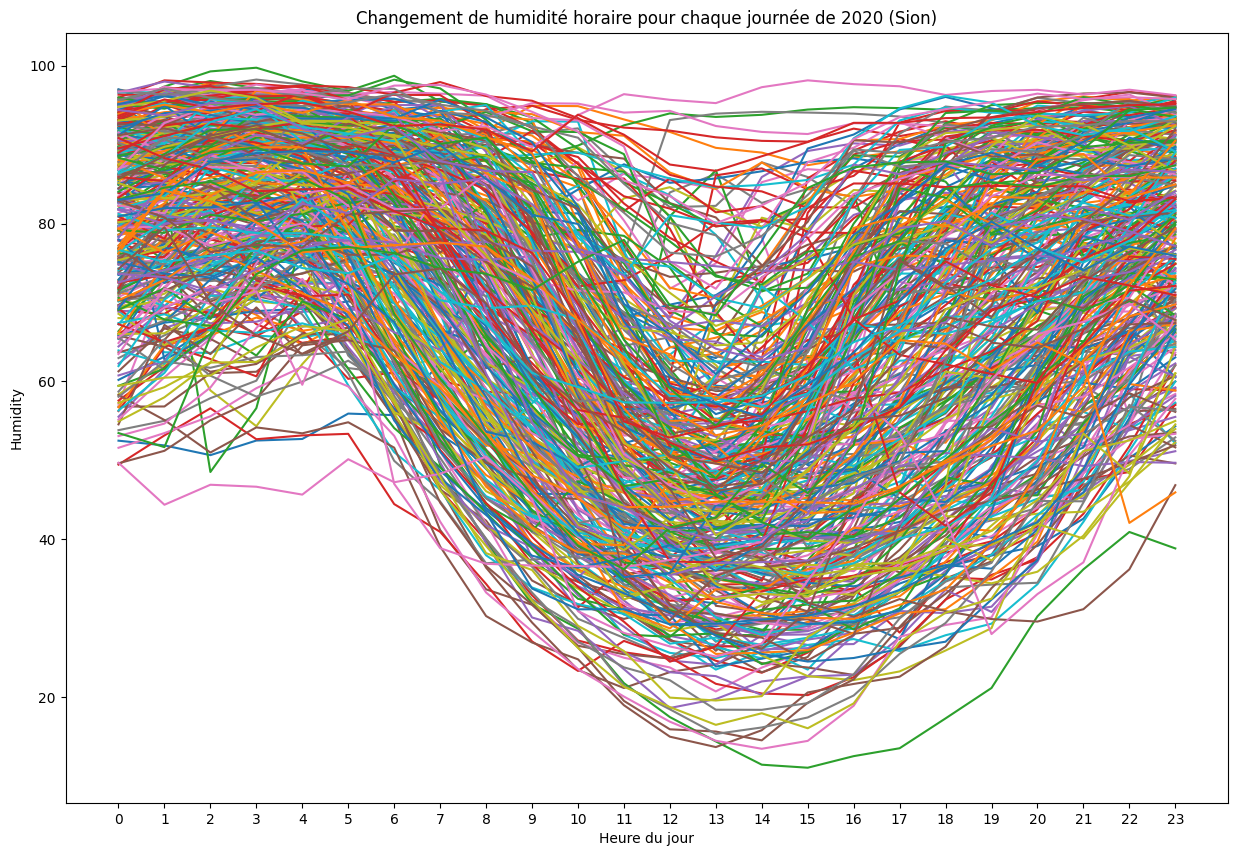

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

data_renamed['date'] = pd.to_datetime(data_renamed['date'])
data_sion_2020 = data_renamed[(data_renamed['station_name'] == 'Sion') & (data_renamed['date'].dt.year == 2020)]
data_sion_2020['day'] = data_sion_2020['date'].dt.date
grouped1 = data_sion_2020.groupby(['day', 'hour'])['humidity_2m'].mean().reset_index()

# Pivoter les données pour faciliter le tracé
pivot_data = grouped1.pivot(index='day', columns='hour', values='humidity_2m')

# Tracer les courbes de température pour chaque jour
plt.figure(figsize=(15, 10))
for day, row in pivot_data.iterrows():
    plt.plot(range(24), row, label=f'{day}')

plt.title('Changement de humidité horaire pour chaque journée de 2020 (Sion)')
plt.xlabel('Heure du jour')
plt.ylabel('Humidity')
plt.xticks(range(24)) 
plt.show()


C:\Users\Abdi\AppData\Local\Temp\ipykernel_10028\1692758078.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = to_time_series_dataset(pivot_data.fillna(method='ffill').values)  # Utiliser ffill pour gérer les NaN si nécessaire


Labels des clusters: [3 3 1 2 3 2 1 1 1 3 1 3 2 2 2 2 1 1 2 0 0 2 1 3 1 1 1 3 1 1 3 3 3 1 0 3 2
 1 1 1 1 1 3 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 0 1 2 2 3 1 1 3 1 1 2
 2 0 2 2 2 0 2 1 1 2 2 0 2 0 2 2 0 3 1 2 0 2 3 2 1 1 1 1 1 0 0 0 0 0 2 2 2
 1 0 0 0 0 1 1 3 1 3 3 2 1 0 3 1 2 1 1 1 3 3 3 1 1 1 2 2 2 0 2 0 1 2 2 2 0
 0 0 2 2 1 2 2 0 1 1 0 1 2 3 1 3 1 1 2 2 1 1 2 2 0 2 2 2 2 2 0 1 1 2 1 2 0
 0 2 1 0 2 2 1 1 3 2 0 0 2 2 2 2 2 2 1 1 1 2 2 2 1 1 1 2 1 2 2 0 2 1 2 2 1
 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 2 2 2 1 3 3 1 1 2 2 0 2 1 2 2 1 1 1 3 1 1 2
 1 1 1 1 1 3 1 1 3 1 1 1 1 3 3 3 0 3 0 2 3 2 1 1 3 1 1 1 1 3 1 1 1 1 2 2 1
 3 3 1 3 1 1 3 1 1 1 0 1 0 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 3 3 2 0 1 0 1 2 1 1 1 1 1 3 3 3 3 3 1 1 1 3 3 3 3 1 1 1 0 3 3 3 2]


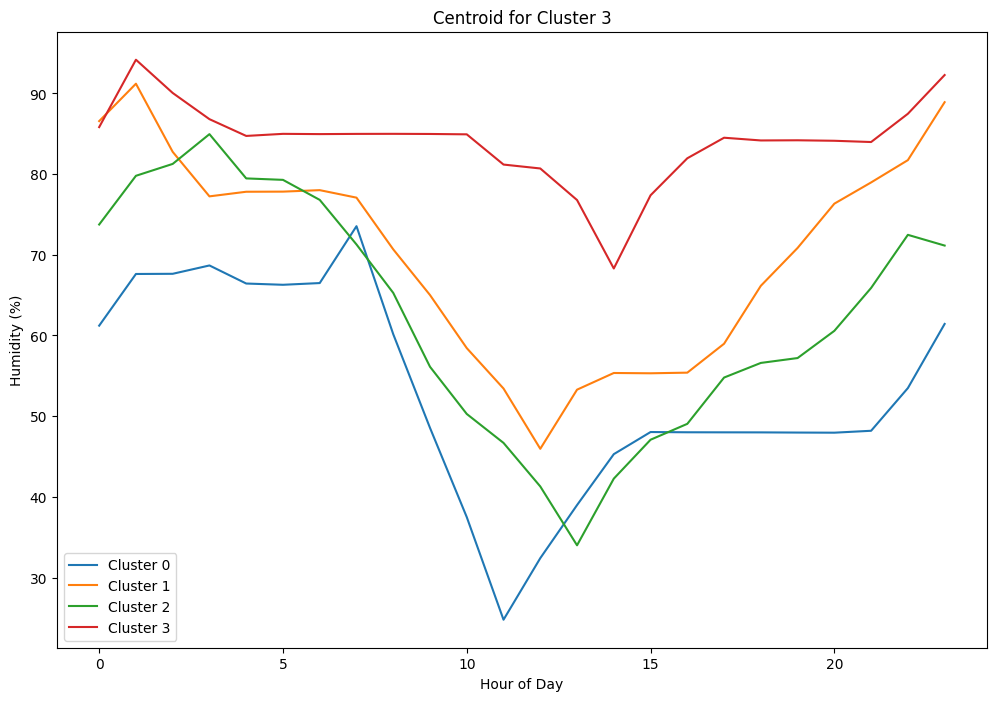

In [67]:
from tslearn.utils import to_time_series_dataset
time_series_data = to_time_series_dataset(pivot_data.fillna(method='ffill').values)  # Utiliser ffill pour gérer les NaN si nécessaire
from tslearn.clustering import TimeSeriesKMeans
import numpy as np

n_clusters = 4 
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=33)
labels = model.fit_predict(time_series_data)
print("Labels des clusters:", labels)
import matplotlib.pyplot as plt

# Afficher les centroids des clusters
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.plot(model.cluster_centers_[i].ravel(), label=f'Cluster {i}')
    plt.title(f'Centroid for Cluster {i}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Humidity (%)')

plt.legend()
plt.show()


C:\Users\Abdi\AppData\Local\Temp\ipykernel_10028\2451083583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sion_2020['day'] = data_sion_2020['date'].dt.date


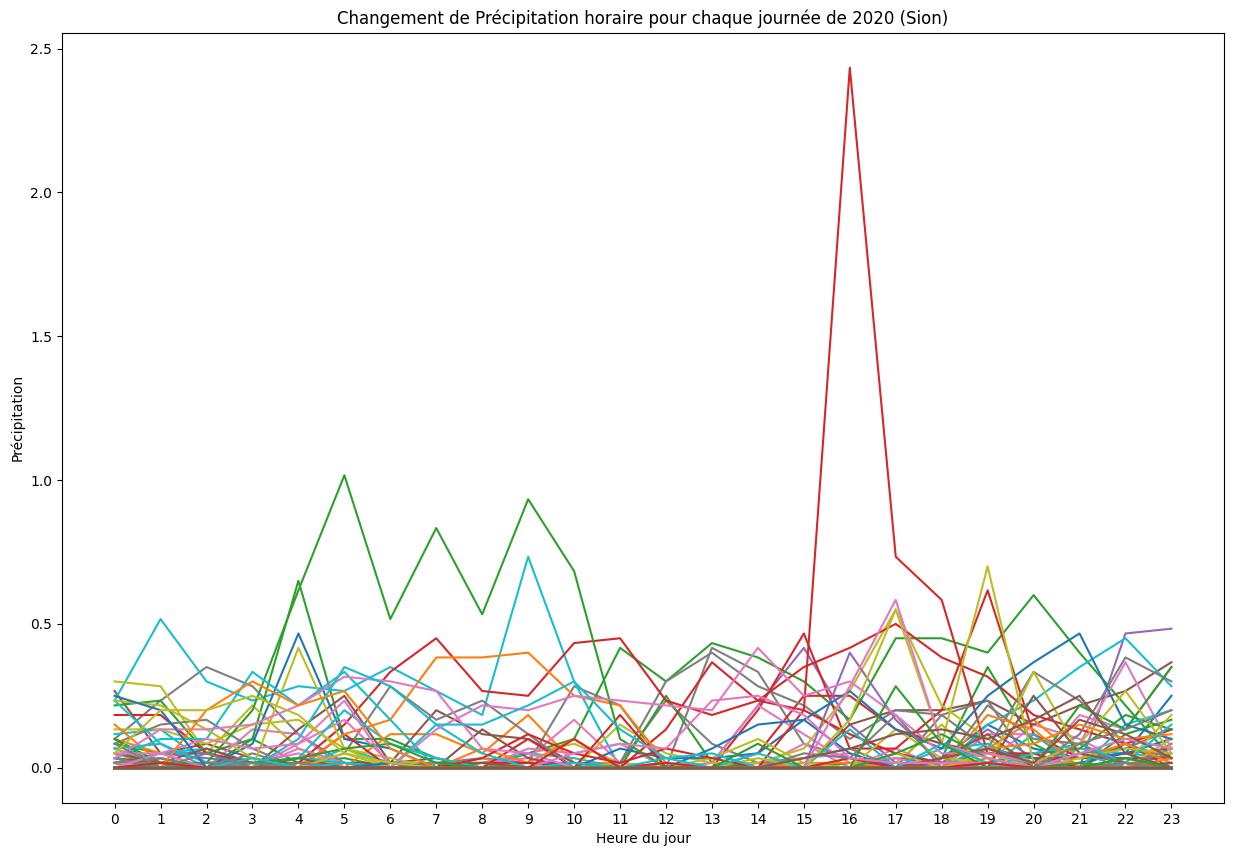

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

data_renamed['date'] = pd.to_datetime(data_renamed['date'])
data_sion_2020 = data_renamed[(data_renamed['station_name'] == 'Sion') & (data_renamed['date'].dt.year == 2020)]
data_sion_2020['day'] = data_sion_2020['date'].dt.date
grouped2 = data_sion_2020.groupby(['day', 'hour'])['precipitation_1h'].mean().reset_index()
pivot_data = grouped2.pivot(index='day', columns='hour', values='precipitation_1h')
plt.figure(figsize=(15, 10))
for day, row in pivot_data.iterrows():
    plt.plot(range(24), row, label=f'{day}')

plt.title('Changement de Précipitation horaire pour chaque journée de 2020 (Sion)')
plt.xlabel('Heure du jour')
plt.ylabel('Précipitation')
plt.xticks(range(24)) 
plt.show()


Labels des clusters: [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


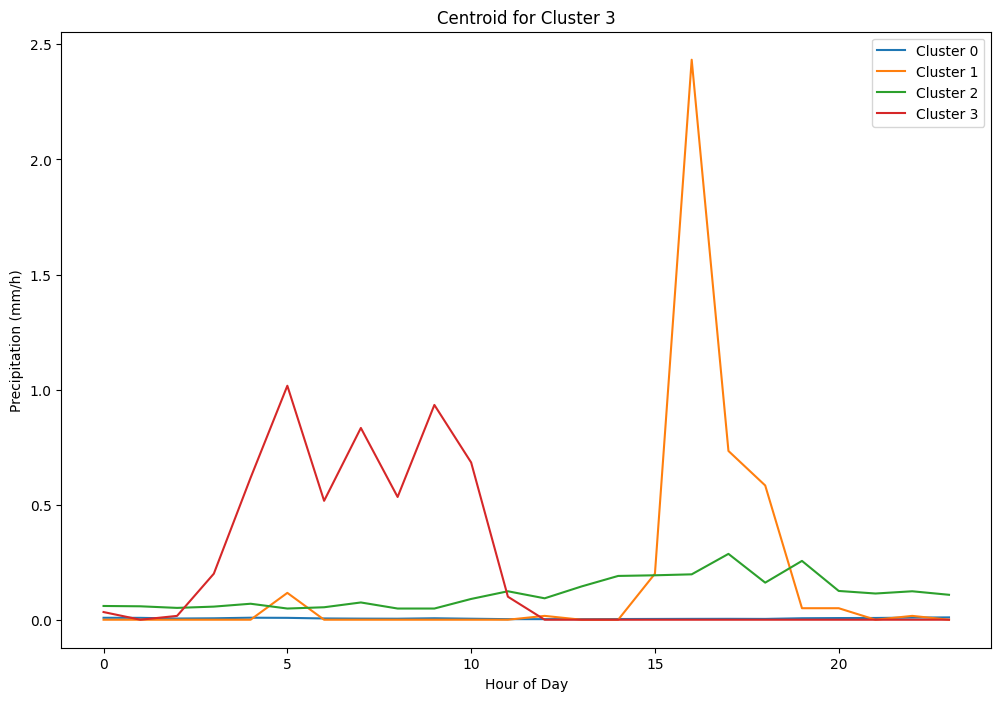

In [69]:
from tslearn.utils import to_time_series_dataset
pivot_data_filled = pivot_data.fillna(0)
time_series_data = to_time_series_dataset(pivot_data_filled)
from tslearn.clustering import TimeSeriesKMeans

n_clusters = 4 
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=33)
labels = model.fit_predict(time_series_data)

# Afficher les étiquettes des clusters pour chaque série temporelle
print("Labels des clusters:", labels)

import matplotlib.pyplot as plt

# Afficher les centroids des clusters
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.plot(model.cluster_centers_[i].ravel(), label=f'Cluster {i}')
    plt.title(f'Centroid for Cluster {i}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Precipitation (mm/h)')

plt.legend()
plt.show()


Ce graph permets de découvrir des groupes de jours ayant des profils de précipitation similaires.

<span style="text-align:center;color: Aqua; font-size: 34px;bold; ">Partie 2: Classification des évolutions des variables à un moment donné avec sclearn et tslearn</span><br>
Cette section se concentre sur la classification des variations des variables à un instant précis, permettant d'analyser leur comportement et leurs tendances au fil du temps.

In [18]:
import pandas as pd

# Supposons que 'data_renamed' est votre DataFrame
# Pour lister toutes les colonnes :
print(data_renamed.columns)


Index(['station_code', 'wind_chill', 'solar_radiation', 'atmospheric_pressure',
       'temperature_2m', 'precipitation_1h', 'humidity_2m', 'snow_depth',
       'wind_speed_10m', 'wind_direction_10m', 'year', 'day_of_year',
       'minute_of_day', 'station_name', 'longitude', 'latitude',
       'longitude_km', 'latitude_km', 'altitude', 'hour', 'month_day', 'date'],
      dtype='object')


<span style="color: Green; font-size: 24px;bold">Elbow Method</span><br>
Objectif est de déterminer le nombre optimal de clusters dans les données lors de l'exécution de méthodes de clustering.<br>

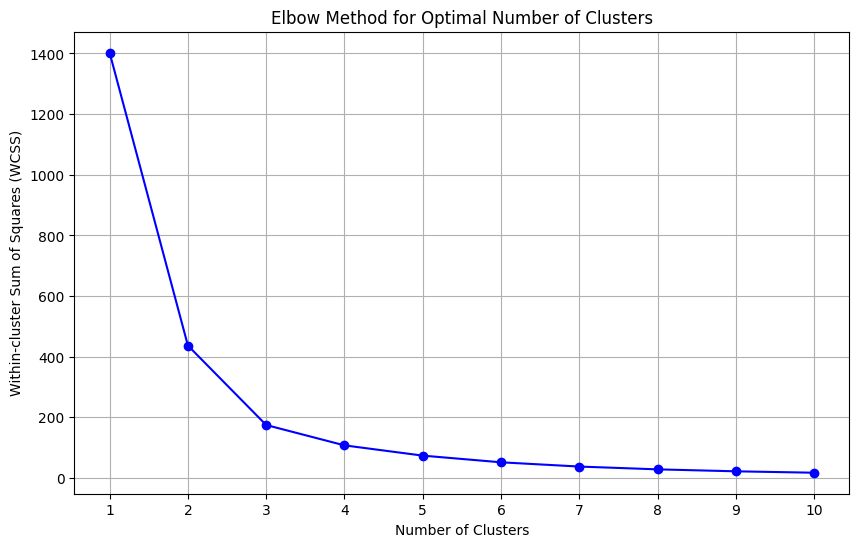

In [14]:
from sklearn.cluster import KMeans
import numpy as np
X = average_temperature_by_hour[['hour', 'temperature_2m']]
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)

plt.show()

<span style="color: Green; font-size: 24px;bold">Clustering des températures moyennes horaires de toutes les stations avec Tslearn.</span><br>
L'analyse de  l'évolution de la température moyenne en Suisse.<br>

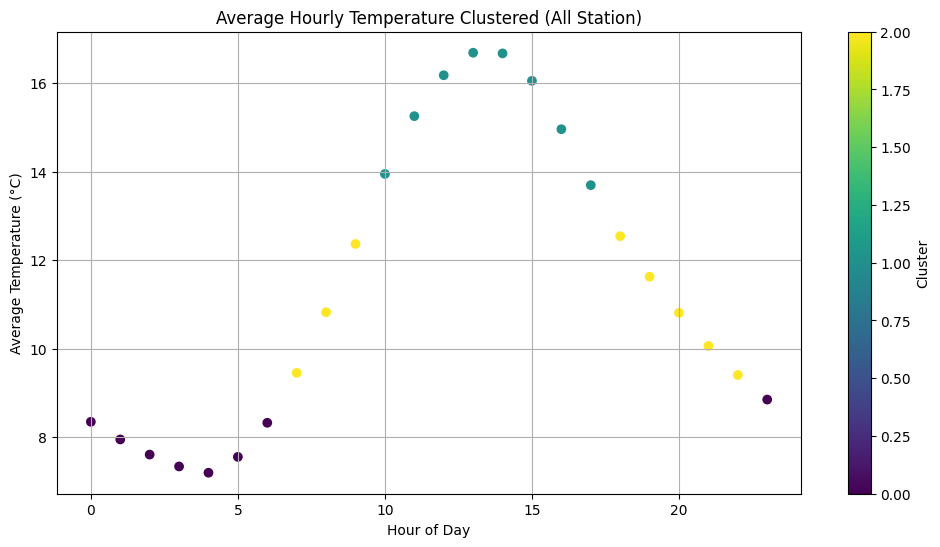

In [46]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import matplotlib.pyplot as plt

temperature_series = average_temperature_by_hour['temperature_2m'].values.reshape(-1, 1, 1)

# Create the time series dataset
formatted_dataset = to_time_series_dataset(temperature_series)

# Apply Time Series K-Means clustering
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, random_state=33)
labels = model.fit_predict(formatted_dataset)

# Assign the cluster labels to the original DataFrame
average_temperature_by_hour['cluster'] = labels

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(average_temperature_by_hour['hour'], average_temperature_by_hour['temperature_2m'], c=average_temperature_by_hour['cluster'], cmap='viridis')
plt.title('Average Hourly Temperature Clustered (All Station)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


<span style="color: Green; font-size: 24px; bold">Clustering des température moyenne mensuelle à travers différentes stations pour 2020. .</span><br>

C:\Users\Abdi\AppData\Local\Temp\ipykernel_6708\1738235873.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_2020 = data_renamed[pd.to_datetime(data_renamed['date']).dt.year == 2020]
C:\Users\Abdi\AppData\Local\Temp\ipykernel_6708\1738235873.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_2020['month'] = pd.to_datetime(data_2020['date']).dt.month
C:\Users\Abdi\AppData\Local\Temp\ipykernel_6708\1738235873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

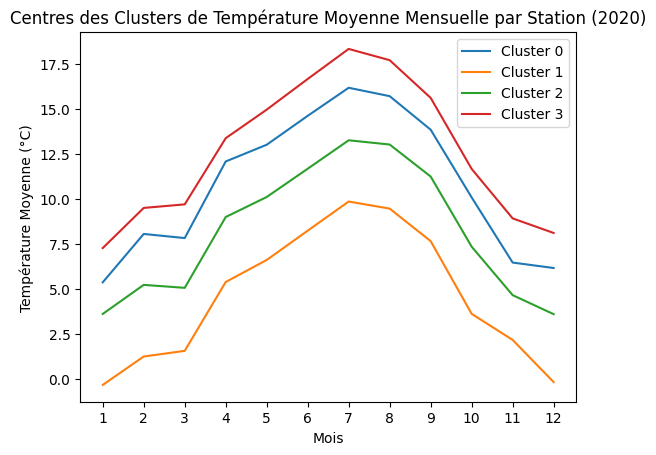

In [23]:
# Filtrer pour l'année 2020
data_2020 = data_renamed[pd.to_datetime(data_renamed['date']).dt.year == 2020]

# Calculer la température moyenne par mois pour chaque station
data_2020['month'] = pd.to_datetime(data_2020['date']).dt.month
monthly_avg_temp_2020 = data_2020.groupby(['station_name', 'month'])['temperature_2m'].mean().reset_index()
from tslearn.utils import to_time_series_dataset

# Supposons que chaque série temporelle représente une station sur l'ensemble
# Pivoter le DataFrame pour obtenir une structure où les rangées représentent des stations et les colonnes représentent des mois
pivot_monthly_avg_temp = monthly_avg_temp_2020.pivot(index='station_name', columns='month', values='temperature_2m')

# Remplacer les valeurs NaN par la moyenne globale pour garder des données cohérentes
# C'est juste un exemple de traitement. Vous pourriez choisir d'interpoler ou de remplir les valeurs manquantes différemment
pivot_monthly_avg_temp_filled = pivot_monthly_avg_temp.fillna(pivot_monthly_avg_temp.mean())

# Convertir le DataFrame pivoté en tableau numpy puis en dataset tslearn
formatted_dataset = to_time_series_dataset(pivot_monthly_avg_temp_filled.to_numpy())
from tslearn.clustering import TimeSeriesKMeans

# Définir et ajuster le modèle de clustering
n_clusters = 4  # Vous pouvez ajuster ce nombre selon vos besoins ou hypothèses sur les données
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=33)
labels = model.fit_predict(formatted_dataset)
import matplotlib.pyplot as plt

# Visualiser les centres des clusters
for i, center in enumerate(model.cluster_centers_):
    plt.plot(center.ravel(), label=f'Cluster {i}')
plt.title('Centres des Clusters de Température Moyenne Mensuelle par Station (2020)')
plt.xlabel('Mois')
plt.ylabel('Température Moyenne (°C)')
plt.xticks(ticks=range(12), labels=range(1, 13))  # De 1 (Janvier) à 12 (Décembre)
plt.legend()
plt.show()


Cluster 0:
['Altdorf', 'Bern / Zollikofen', 'Buchs / Aarau', 'Chur', 'Delémont', 'Glarus', 'Interlaken', 'Luzern', 'Mathod', 'Neuchâtel', 'Schaffhausen', 'Sion', 'St. Gallen', 'Visp', 'Zürich / Fluntern']


Cluster 1:
['Davos', 'Le Moléson', 'Samedan', 'Zermatt']


Cluster 2:
['Adelboden', 'Disentis', 'Engelberg', 'La Chaux-de-Fonds', 'Piotta']


Cluster 3:
['Basel / Binningen', 'Evionnaz', 'Genève / Cointrin', 'Locarno / Monti', 'Lugano', 'Pully']




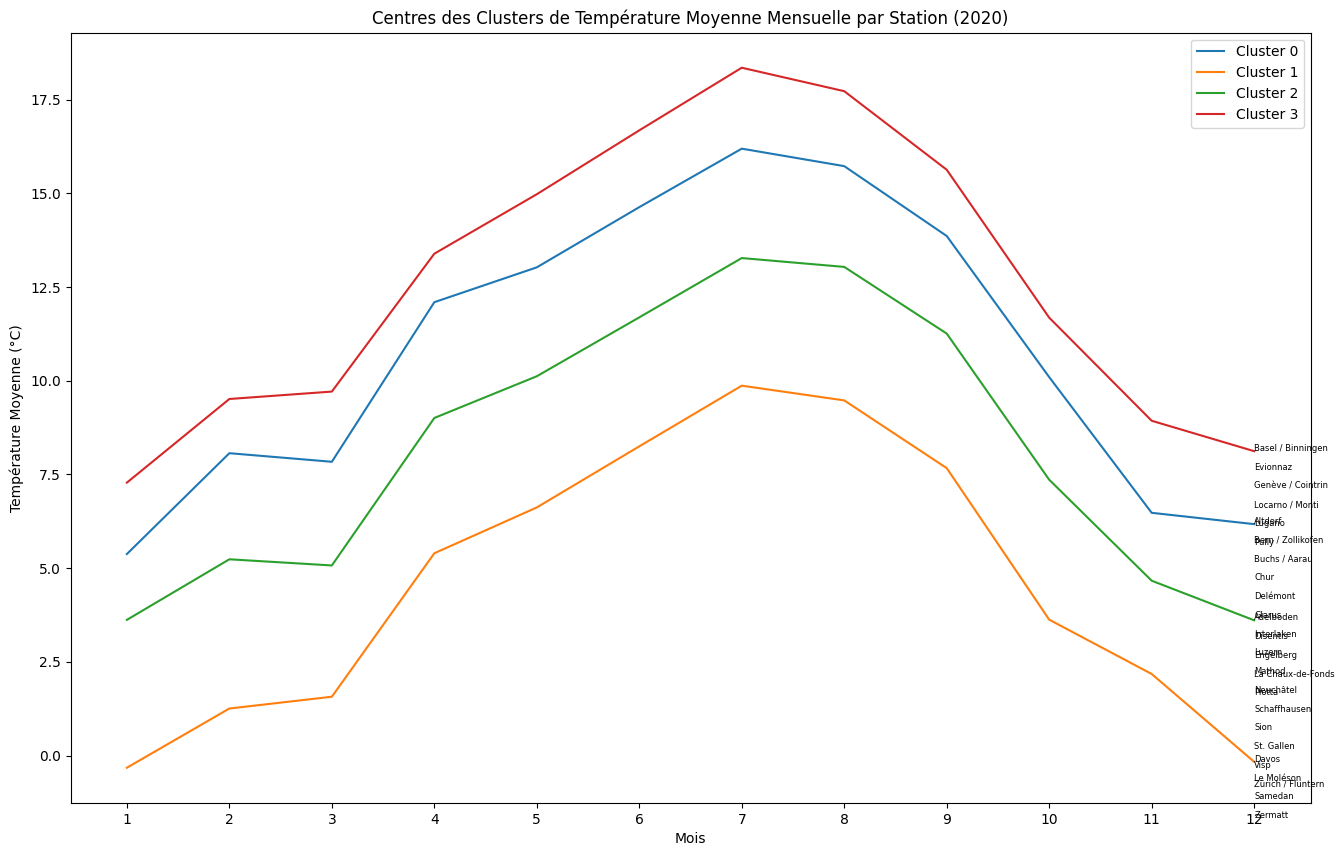

In [30]:
# Ajouter les étiquettes de cluster au DataFrame pivoté
pivot_monthly_avg_temp_filled['cluster'] = labels
# Group by cluster and print station names
for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id}:")
    cluster_stations = pivot_monthly_avg_temp_filled[pivot_monthly_avg_temp_filled['cluster'] == cluster_id]
    print(cluster_stations.index.tolist())  # Afficher les noms des stations dans ce cluster
    print("\n")
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))  # Largeur de 15 pouces et hauteur de 8 pouces

# Visualiser les centres des clusters avec annotations
for i, center in enumerate(model.cluster_centers_):
    plt.plot(center.ravel(), label=f'Cluster {i}')
    # Annoter chaque centre de cluster avec les noms des stations
    for idx, name in enumerate(pivot_monthly_avg_temp_filled[pivot_monthly_avg_temp_filled['cluster'] == i].index):
        plt.text(11, center[-1] - idx*0.5, name, fontsize=6)  # Décaler légèrement chaque annotation pour éviter les superpositions
plt.title('Centres des Clusters de Température Moyenne Mensuelle par Station (2020)')
plt.xlabel('Mois')
plt.ylabel('Température Moyenne (°C)')
plt.xticks(ticks=range(12), labels=range(1, 13))  # De 1 (Janvier) à 12 (Décembre)
plt.legend()
plt.show()




Chaque ligne représente le profil moyen d'un cluster sur l'année, offrant des insights sur les variations saisonnières des températures parmi les stations regroupées.

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

372.518 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.0s


294.680 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


288.213 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


286.547 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


286.116 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


285.798 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


285.476 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


285.357 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


285.159 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


284.907 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s


284.347 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


283.752 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


283.711 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


282.333 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


282.074 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


282.074 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s


Labels des clusters : [0 3 3 0 0 0 0 3 3 3 3 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0
 0 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2
 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 3 0 0 0 3 3 0 3 3 0
 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 1 1 1 1 3 1 1 1 1 3 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 3 3 1 1 1 1 1
 3 1 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 0 3 3 3 3]


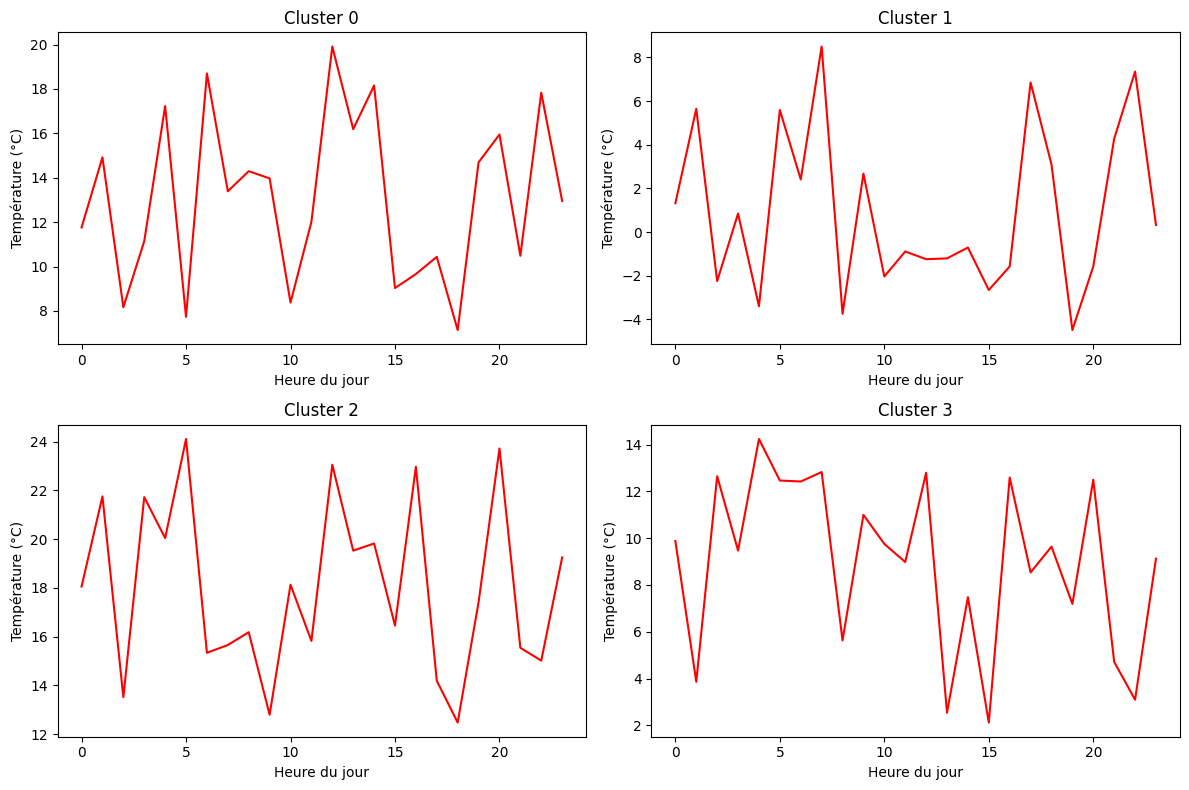

In [23]:
import pandas as pd
import numpy as np
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt

# Simulation de données de température horaire pour une année (pour la démo)
# Créons des données pour Sion pour 2020
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=366 * 24, freq='H')
temperatures = np.random.normal(loc=10, scale=5, size=366 * 24)  # Températures simulées

data_sion = pd.DataFrame({
    'date': dates,
    'temperature_2m': temperatures + 10 * np.sin(np.linspace(0, 24, 366 * 24) * np.pi / 12)  # Variation diurne
})
data_sion['day'] = data_sion['date'].dt.date

# Grouper les données par jour pour former des séries temporelles journalières
daily_temperatures = data_sion.groupby('day')['temperature_2m'].apply(list)

# Convertir en un ensemble de données de série temporelle pour tslearn
formatted_dataset = to_time_series_dataset(list(daily_temperatures))
# Définir le modèle TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", verbose=True, random_state=33)
labels = model.fit_predict(formatted_dataset)

# Vérifier les étiquettes des clusters
print("Labels des clusters :", labels)
# Afficher les centroids des clusters
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(model.cluster_centers_[i].ravel(), "r-")
    plt.title(f"Cluster {i}")
    plt.xlabel("Heure du jour")
    plt.ylabel("Température (°C)")
plt.tight_layout()
plt.show()


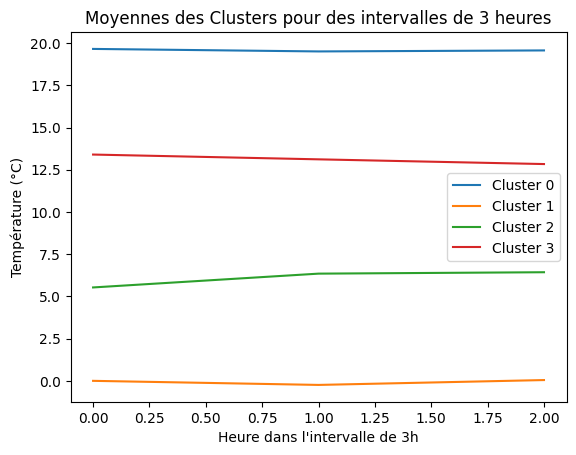

In [13]:
# Supposons que `data_sion` soit votre DataFrame avec des températures horaires pour la ville de Sion
# Ici, `data_sion` a déjà été filtré pour l'année et la ville concernée

# Créons des séries temporelles pour des intervalles de 3 heures
series_3h = [data_sion.iloc[i:i+3]['temperature_2m'].values for i in range(0, data_sion.shape[0], 3)]

# Nous devons nous assurer que chaque série a la même longueur, donc on ne prend que les séries complètes
series_3h = [serie for serie in series_3h if len(serie) == 3]

# Convertir en un dataset de séries temporelles pour tslearn
formatted_dataset = to_time_series_dataset(series_3h)
# Utilisation de TimeSeriesKMeans pour clusteriser les séries temporelles de 3 heures
model = TimeSeriesKMeans(n_clusters=4, random_state=33)
labels = model.fit_predict(formatted_dataset)
# Afficher les clusters
for cluster_index in range(model.n_clusters):
    cluster_series = formatted_dataset[labels == cluster_index]
    
    # Calculer la série moyenne pour le cluster
    cluster_mean = np.mean(cluster_series, axis=0)
    
    plt.plot(cluster_mean.ravel(), label=f'Cluster {cluster_index}')

plt.legend()
plt.xlabel('Heure dans l\'intervalle de 3h')
plt.ylabel('Température (°C)')
plt.title('Moyennes des Clusters pour des intervalles de 3 heures')
plt.show()


<span style="color: Green; font-size: 24px;bold">Clustering des températures moyennes horaires de toutes les stations avec sklearn.</span><br>
L'analyse de  l'évolution de la température moyenne en Suisse.<br>

c:\Users\Abdi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


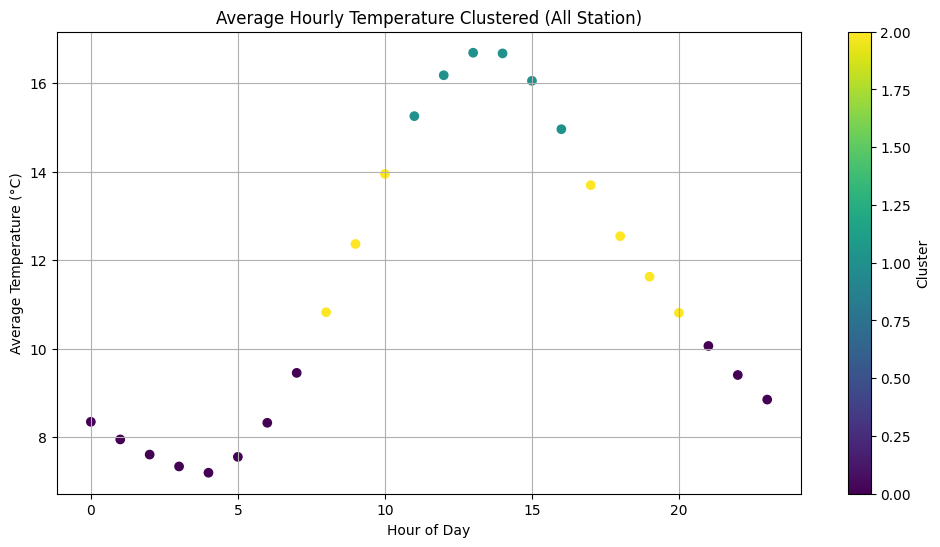

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=33)
labels = kmeans.fit_predict(average_temperature_by_hour['temperature_2m'].values.reshape(-1, 1))

average_temperature_by_hour['cluster'] = labels

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(average_temperature_by_hour['hour'], average_temperature_by_hour['temperature_2m'], c=average_temperature_by_hour['cluster'], cmap='viridis')
plt.title('Average Hourly Temperature Clustered (All Station)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


<span style="color: Green; font-size: 24px;bold">Clustering des températures moyennes horaires de Sion station avec tslearn.</span><br>

1.153 --> 0.926 --> 0.926 --> 


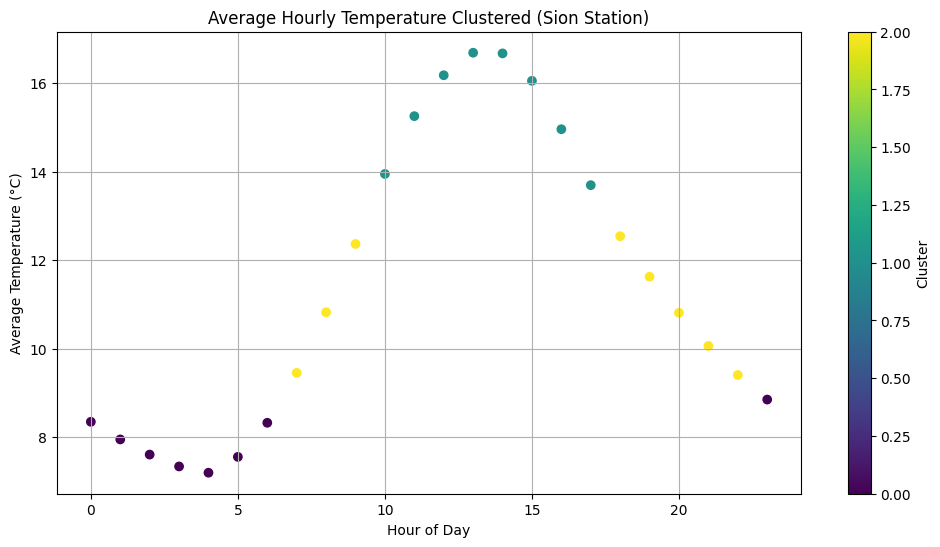

In [48]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import matplotlib.pyplot as plt


andeer_data = data_renamed[data_renamed['station_name'] == 'Sion']
average_hourly_temps = andeer_data.groupby('hour')['temperature_2m'].mean().reset_index()
temperature_series = average_hourly_temps['temperature_2m'].values.reshape(-1, 1, 1)

# Create the time series dataset
formatted_dataset = to_time_series_dataset(temperature_series)

# Perform time series clustering
model = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=33)
labels = model.fit_predict(formatted_dataset)

# Assign the cluster labels to each hour in the average hourly temperatures DataFrame
average_hourly_temps['cluster'] = labels.flatten()

plt.figure(figsize=(12, 6))
plt.scatter(average_hourly_temps['hour'], average_hourly_temps['temperature_2m'], c=average_hourly_temps['cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('Average Hourly Temperature Clustered (Sion Station)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()


<span style="color: Green; font-size: 24px;bold">Clustering des températures moyennes horaires de Sion station avec sklearn.</span><br>

c:\Users\Abdi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


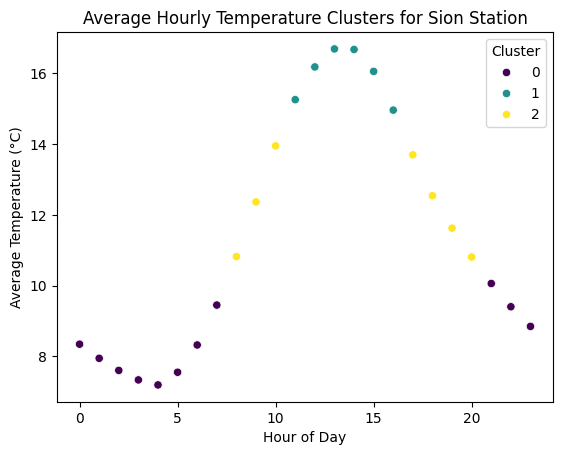

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

andeer_data = data_renamed[data_renamed['station_name'] == 'Sion']

average_hourly_temps = andeer_data.groupby('hour')['temperature_2m'].mean().reset_index()

X = average_hourly_temps[['temperature_2m']]

kmeans = KMeans(n_clusters=3, random_state=33)
average_hourly_temps['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(x='hour', y='temperature_2m', hue='cluster', data=average_hourly_temps, palette='viridis')
plt.title('Average Hourly Temperature Clusters for Sion Station')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Cluster')
plt.show()


<span style="color: Green; font-size: 24px;bold"> Création de la colonne de mois(month) </span>

In [9]:
import pandas as pd
data_renamed['date'] = pd.to_datetime(data_renamed['date'])
data_renamed['month'] = data_renamed['date'].dt.month



C:\Users\Abdi\AppData\Local\Temp\ipykernel_18404\1645563817.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_renamed['date'] = pd.to_datetime(data_renamed['date'])


In [10]:
data_renamed.head()

station_code  wind_chill  solar_radiation  atmospheric_pressure  \
0          ABO         2.7              3.0                 879.1   
1          ABO         2.1              4.0                 879.0   
2          ABO         3.4              3.0                 878.9   
3          ABO         2.5              2.0                 878.8   
4          ABO         2.3              2.0                 878.6   

   temperature_2m  precipitation_1h  humidity_2m  snow_depth  wind_speed_10m  \
0             2.7               0.0         55.9         0.0             2.2   
1             2.1               0.0         56.0         0.0             2.2   
2             3.4               0.0         52.7         0.0             3.6   
3             2.5               0.0         55.5         0.0             2.5   
4             2.3               0.0         56.6         0.0             4.3   

   wind_direction_10m  ...  station_name  longitude  latitude longitude_km  \
0               228.0  ...     Adelboden   7.566667      46.5     609372.0   
1               355.0  ...     Adelboden   7.566667      46.5     609372.0   
2               225.0  ...     Adelboden   7.566667      46.5     609372.0   
3                 4.0  ...     Adelboden   7.566667      46.5     609372.0   
4               262.0  ...     Adelboden   7.566667      46.5     609372.0   

   latitude_km  altitude  hour  month_day       date  month  
0     148939.0    1321.0     0      01-01 2020-01-01      1  
1     148939.0    1321.0     0      01-01 2020-01-01      1  
2     148939.0    1321.0     0      01-01 2020-01-01      1  
3     148939.0    1321.0     0      01-01 2020-01-01      1  
4     148939.0    1321.0     0      01-01 2020-01-01      1  

[5 rows x 23 columns]

<span style="color: Green; font-size: 24px;bold"> Cluestering des températures moyennes mensuelles afin d'analyser les variations saisonnières </span>

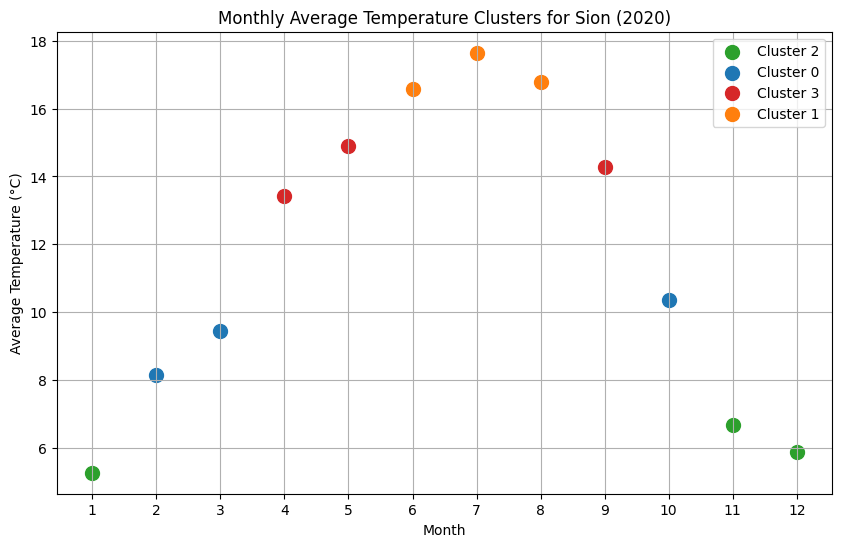

In [54]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import numpy as np
import matplotlib.pyplot as plt

andeer_2020_data = data_renamed[
    (data_renamed['station_name'] == 'Sion') & 
    (data_renamed['year'] == 2020)
]

monthly_avg_temp = andeer_2020_data.groupby('month')['temperature_2m'].mean().reset_index()

monthly_temps_series = monthly_avg_temp['temperature_2m'].values.reshape(-1, 1)
monthly_temps_series = to_time_series_dataset(list(monthly_temps_series))


model = TimeSeriesKMeans(n_clusters=n_clusters, random_state=33)
labels = model.fit_predict(monthly_temps_series)


months = np.arange(1, 13)  

plt.figure(figsize=(10, 6))
for i, month in enumerate(months):
    # Use the cluster label for each month to determine the color
    cluster_label = labels[i]
    plt.scatter(month, monthly_avg_temp['temperature_2m'][i], c='C'+str(cluster_label), label=f'Cluster {cluster_label}', s=100)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Monthly Average Temperature Clusters for Sion (2020)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=months)  
plt.grid(True)
plt.show()


<span style="color: Green; font-size: 24px;bold"> Analyse des tendances saisonnières pour la station de Sion</span>

C:\Users\Abdi\AppData\Local\Temp\ipykernel_15572\34299499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  andeer_2020_data['date'] = pd.to_datetime(andeer_2020_data['date'])
C:\Users\Abdi\AppData\Local\Temp\ipykernel_15572\34299499.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  andeer_2020_data['day_of_year'] = andeer_2020_data['date'].dt.dayofyear
c:\Users\Abdi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wil

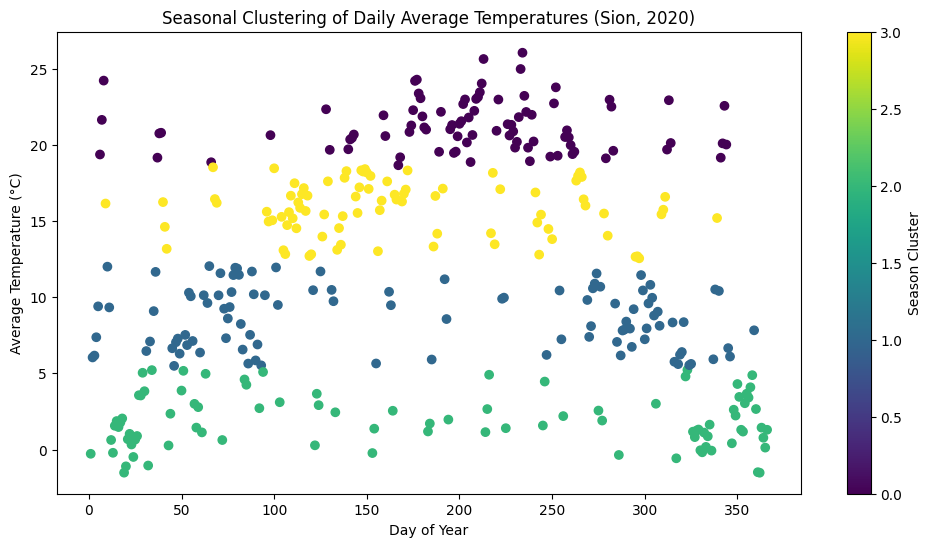

In [51]:

andeer_2020_data = data_renamed[(data_renamed['station_name'] == 'Sion')& (data_renamed['year'] == 2020) ]
andeer_2020_data['date'] = pd.to_datetime(andeer_2020_data['date'])
andeer_2020_data['day_of_year'] = andeer_2020_data['date'].dt.dayofyear

daily_avg_temp = andeer_2020_data.groupby('day_of_year')['temperature_2m'].mean().reset_index()
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
daily_avg_temp['cluster'] = kmeans.fit_predict(daily_avg_temp[['temperature_2m']])
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(daily_avg_temp['day_of_year'], daily_avg_temp['temperature_2m'], c=daily_avg_temp['cluster'], cmap='viridis')
plt.title('Seasonal Clustering of Daily Average Temperatures (Sion, 2020)')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Season Cluster')
plt.show()


<span style="color: Green; font-size: 24px;bold"> Utilisation de l'algorithme DBSCAN pour créer des clusters saisonnières.</span>

In [20]:
from sklearn.cluster import DBSCAN
import numpy as np

daily_avg_temp['normalized_day'] = daily_avg_temp['day_of_year'] / 365.0
features = daily_avg_temp[['normalized_day', 'temperature_2m']]
dbscan = DBSCAN(eps=0.1, min_samples=5)
daily_avg_temp['cluster'] = dbscan.fit_predict(features)
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Number of clusters found: {num_clusters}")


Number of clusters found: 4


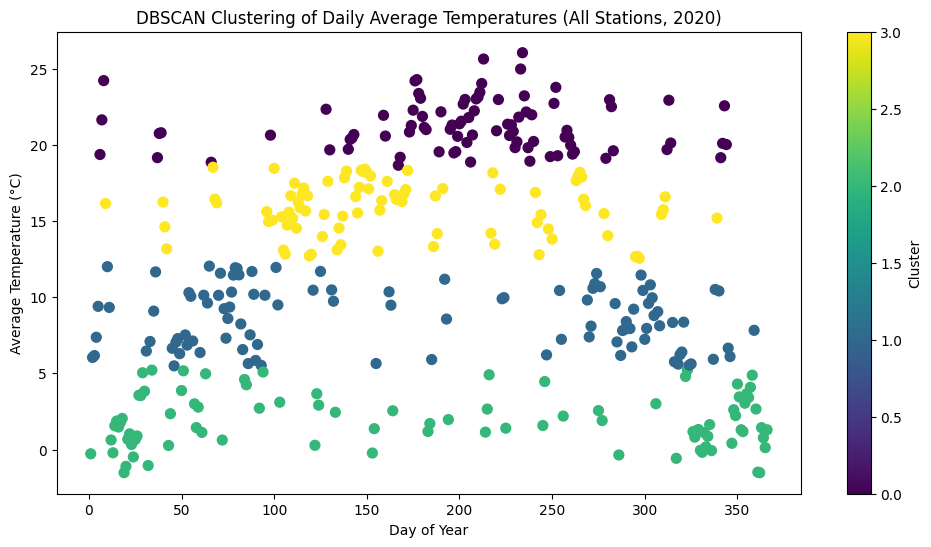

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(daily_avg_temp['day_of_year'], daily_avg_temp['temperature_2m'], c=daily_avg_temp['cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Daily Average Temperatures (All Stations, 2020)')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Cluster')
plt.show()


<span style="color: Green; font-size: 24px;bold"> Utilisation de l'algorithme DBSCAN pour analyser les variations quotidiennes de température tout au long d'une année à Genève..</span>

C:\Users\Abdi\AppData\Local\Temp\ipykernel_18404\3442063220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geneve_2020_data['date'] = pd.to_datetime(geneve_2020_data['date'])
C:\Users\Abdi\AppData\Local\Temp\ipykernel_18404\3442063220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geneve_2020_data['day_of_year'] = geneve_2020_data['date'].dt.dayofyear


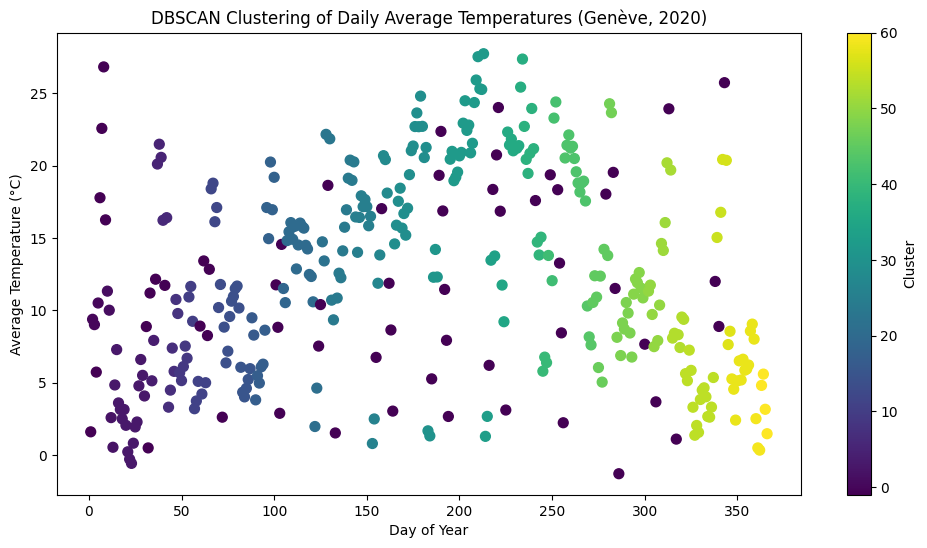

In [14]:

geneve_2020_data = data_renamed[
    (data_renamed['station_name'] == 'Genève / Cointrin') & 
    (data_renamed['year'] == 2020)
]

geneve_2020_data['date'] = pd.to_datetime(geneve_2020_data['date'])
geneve_2020_data['day_of_year'] = geneve_2020_data['date'].dt.dayofyear
daily_avg_temp_geneve = geneve_2020_data.groupby('day_of_year')['temperature_2m'].mean().reset_index()
from sklearn.cluster import DBSCAN
import numpy as np
features_geneve = daily_avg_temp_geneve[['day_of_year', 'temperature_2m']]
dbscan_geneve = DBSCAN(eps=3, min_samples=2)
daily_avg_temp_geneve['cluster'] = dbscan_geneve.fit_predict(features_geneve)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(daily_avg_temp_geneve['day_of_year'], daily_avg_temp_geneve['temperature_2m'], c=daily_avg_temp_geneve['cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Daily Average Temperatures (Genève, 2020)')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\Abdi\AppData\Local\Temp\ipykernel_18404\2905260738.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geneve_2020_data['date'] = pd.to_datetime(geneve_2020_data['date'])
C:\Users\Abdi\AppData\Local\Temp\ipykernel_18404\2905260738.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geneve_2020_data['day_of_year'] = geneve_2020_data['date'].dt.dayofyear


Nombre de clusters: 3


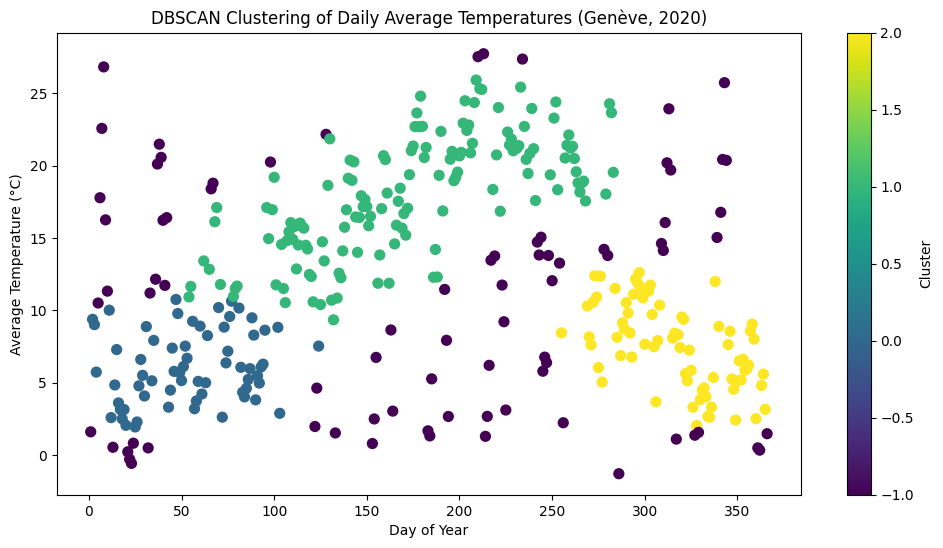

In [38]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

geneve_2020_data = data_renamed[
    (data_renamed['station_name'] == 'Genève / Cointrin') & 
    (data_renamed['year'] == 2020)
]

geneve_2020_data['date'] = pd.to_datetime(geneve_2020_data['date'])
geneve_2020_data['day_of_year'] = geneve_2020_data['date'].dt.dayofyear
daily_avg_temp_geneve = geneve_2020_data.groupby('day_of_year')['temperature_2m'].mean().reset_index()
features_geneve = np.array(daily_avg_temp_geneve[['day_of_year', 'temperature_2m']])
from sklearn.preprocessing import StandardScaler
features_geneve_scaled = StandardScaler().fit_transform(features_geneve)
dbscan_geneve = DBSCAN(eps=0.5, min_samples=40).fit(features_geneve_scaled)
daily_avg_temp_geneve['cluster'] = dbscan_geneve.labels_

n_clusters_ = len(set(dbscan_geneve.labels_)) - (1 if -1 in dbscan_geneve.labels_ else 0)
print(f'Nombre de clusters: {n_clusters_}')


plt.figure(figsize=(12, 6))
plt.scatter(daily_avg_temp_geneve['day_of_year'], daily_avg_temp_geneve['temperature_2m'], c=daily_avg_temp_geneve['cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Daily Average Temperatures (Genève, 2020)')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Cluster')
plt.show()


<span style="color: Green; font-size: 24px;bold"> Clustering pour étudier les variations saisonnières à Genève</span>

C:\Users\Abdi\AppData\Local\Temp\ipykernel_15572\1474304704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geneve_2020_data['month'] = geneve_2020_data['date'].dt.month


Number of clusters for monthly data (excluding noise): 5


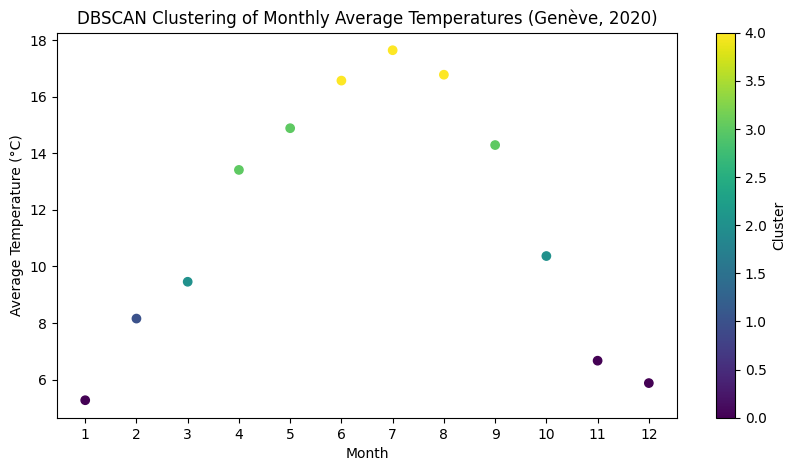

In [25]:

geneve_2020_data['month'] = geneve_2020_data['date'].dt.month

# Calculate the monthly average temperature
monthly_avg_temp_geneve = geneve_2020_data.groupby('month')['temperature_2m'].mean().reset_index()
from sklearn.cluster import DBSCAN
features_geneve_monthly = monthly_avg_temp_geneve[['temperature_2m']]

# Apply DBSCAN
dbscan_geneve_monthly = DBSCAN(eps=1, min_samples=1)
monthly_avg_temp_geneve['cluster'] = dbscan_geneve_monthly.fit_predict(features_geneve_monthly)

# Print the number of clusters, excluding noise
num_clusters_geneve_monthly = len(set(dbscan_geneve_monthly.labels_)) - (1 if -1 in dbscan_geneve_monthly.labels_ else 0)
print(f"Number of clusters for monthly data (excluding noise): {num_clusters_geneve_monthly}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(monthly_avg_temp_geneve['month'], monthly_avg_temp_geneve['temperature_2m'], c=monthly_avg_temp_geneve['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of Monthly Average Temperatures (Genève, 2020)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Cluster')
plt.xticks(monthly_avg_temp_geneve['month'])  
plt.show()


<span style="color: Green; font-size: 24px;bold">Clustering par station</span><br>
Objectif : Regrouper les stations présentant des profils de températures mensuelles similaires.

C:\Users\Abdi\AppData\Local\Temp\ipykernel_15572\1154254626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['date'] = pd.to_datetime(data_2020['date'])
C:\Users\Abdi\AppData\Local\Temp\ipykernel_15572\1154254626.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['month'] = data_2020['date'].dt.month
c:\Users\Abdi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4.

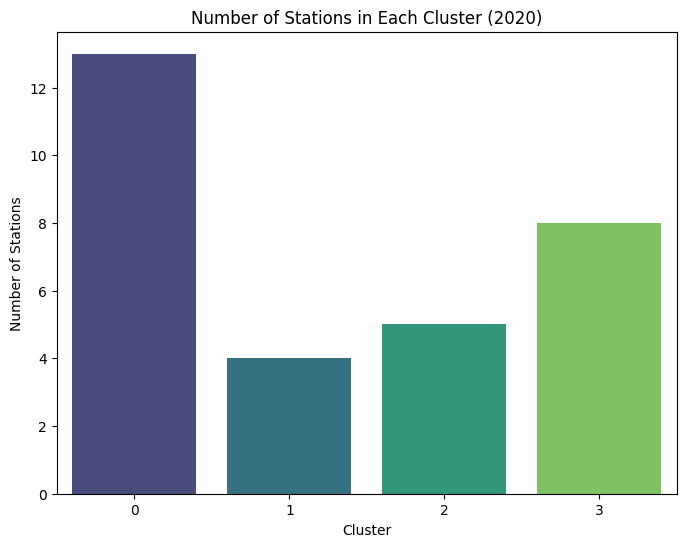

In [26]:

data_2020 = data_renamed[data_renamed['year'] == 2020]

data_2020['date'] = pd.to_datetime(data_2020['date'])
data_2020['month'] = data_2020['date'].dt.month

monthly_avg_temp_2020 = data_2020.groupby(['station_name', 'month'])['temperature_2m'].mean().reset_index()
pivot_monthly_avg_temp = monthly_avg_temp_2020.pivot(index='station_name', columns='month', values='temperature_2m')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)  
clusters = kmeans.fit_predict(pivot_monthly_avg_temp.fillna(pivot_monthly_avg_temp.mean()))
pivot_monthly_avg_temp['cluster'] = clusters
# Count the number of stations in each cluster
cluster_counts = pivot_monthly_avg_temp['cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Stations in Each Cluster (2020)')
plt.xlabel('Cluster')
plt.ylabel('Number of Stations')
plt.show()


C:\Users\Abdi\AppData\Local\Temp\ipykernel_15572\328666573.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivoted_data_filled = pivoted_data.fillna(method='ffill', axis=1)
c:\Users\Abdi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


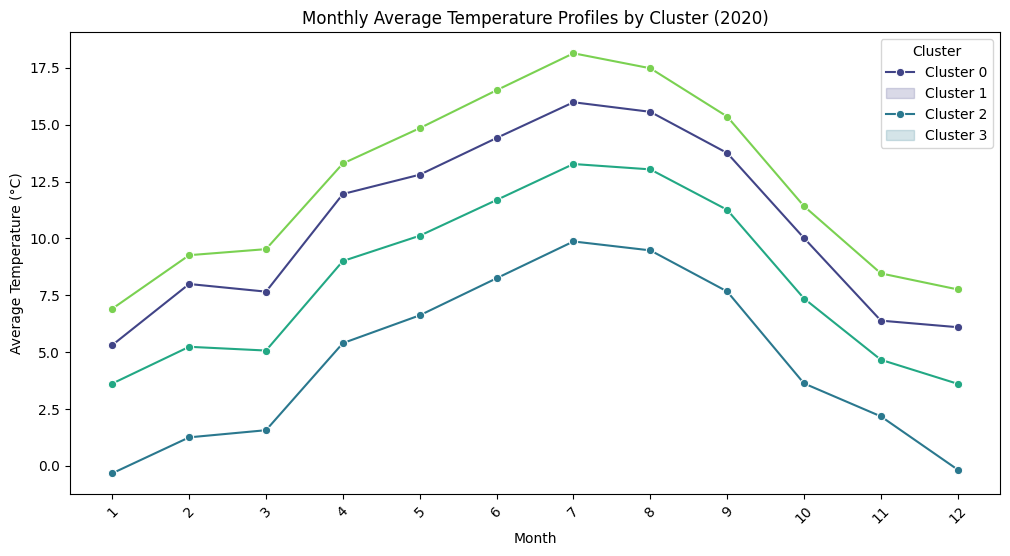

In [27]:

data_2020 = data_renamed[data_renamed['year'] == 2020]
monthly_avg_temp_2020 = data_2020.groupby(['station_name', 'month'])['temperature_2m'].mean().reset_index()
pivoted_data = monthly_avg_temp_2020.pivot(index='station_name', columns='month', values='temperature_2m')
pivoted_data_filled = pivoted_data.fillna(method='ffill', axis=1)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)  
clusters = kmeans.fit_predict(pivoted_data_filled)
pivoted_data_filled['Cluster'] = clusters
import matplotlib.pyplot as plt
import seaborn as sns

centroids = kmeans.cluster_centers_
plt.figure(figsize=(12, 6))
sns.lineplot(data=centroids.T, dashes=False, palette='viridis', markers=['o']*centroids.shape[0])
plt.title('Monthly Average Temperature Profiles by Cluster (2020)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=range(pivoted_data_filled.columns[:-1].shape[0]), labels=pivoted_data_filled.columns[:-1], rotation=45)
plt.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(centroids.shape[0])])
plt.show()


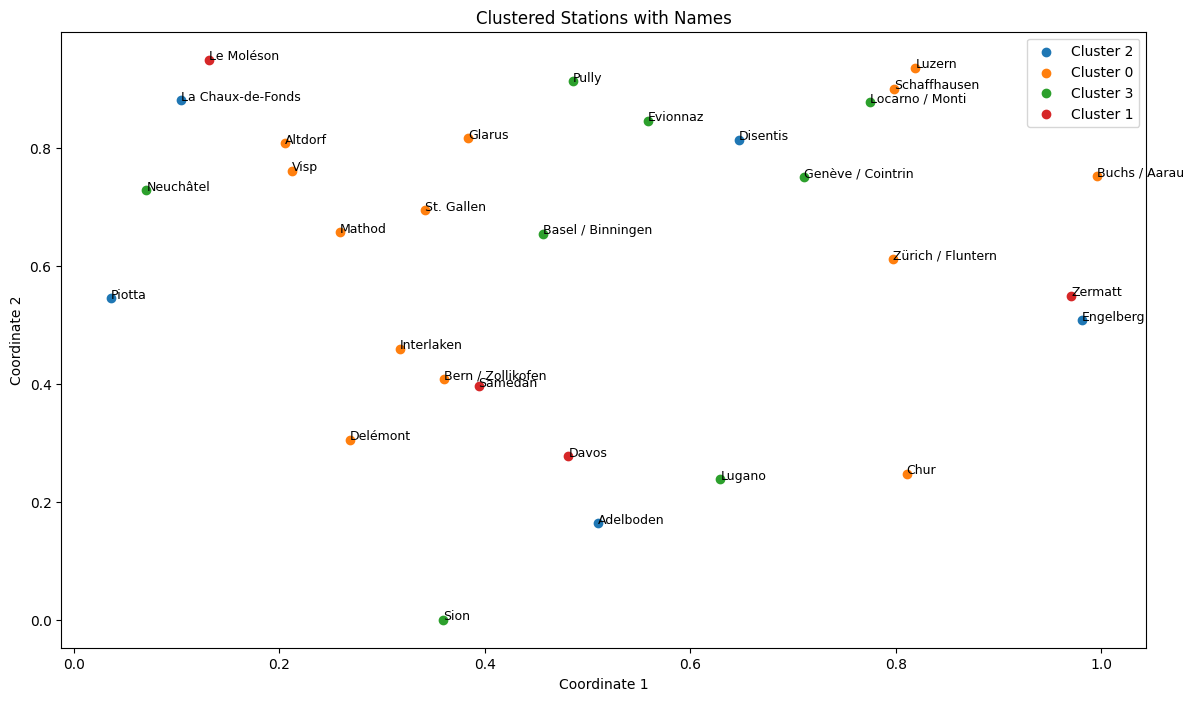

In [28]:

import pandas as pd
import numpy as np

plot_data = pd.DataFrame({
    'Station': pivoted_data_filled.index,
    'Cluster': pivoted_data_filled['Cluster'],
    'Coord1': np.random.rand(len(pivoted_data_filled)),  
    'Coord2': np.random.rand(len(pivoted_data_filled))   
})
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

for cluster in plot_data['Cluster'].unique():
    cluster_data = plot_data[plot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Coord1'], cluster_data['Coord2'], label=f'Cluster {cluster}')
    
    for _, row in cluster_data.iterrows():
        plt.text(row['Coord1'], row['Coord2'], row['Station'], fontsize=9)

plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.title('Clustered Stations with Names')
plt.legend()
plt.show()


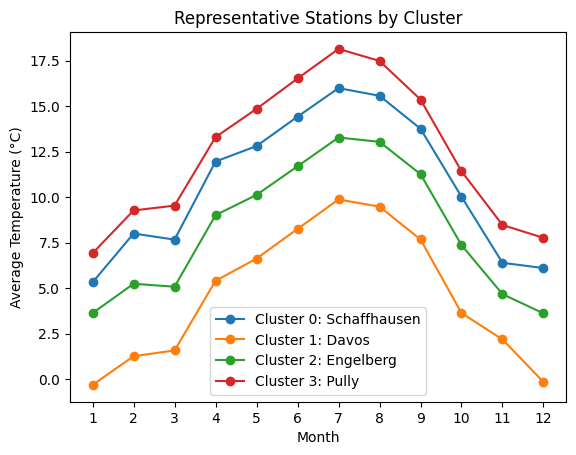

Cluster 0:
Altdorf, Bern / Zollikofen, Buchs / Aarau, Chur, Delémont, Glarus, Interlaken, Luzern, Mathod, Schaffhausen, St. Gallen, Visp, Zürich / Fluntern
-----
Cluster 1:
Davos, Le Moléson, Samedan, Zermatt
-----
Cluster 2:
Adelboden, Disentis, Engelberg, La Chaux-de-Fonds, Piotta
-----
Cluster 3:
Basel / Binningen, Evionnaz, Genève / Cointrin, Locarno / Monti, Lugano, Neuchâtel, Pully, Sion
-----


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
for i, centroid in enumerate(kmeans.cluster_centers_):
    cluster_indices = np.where(clusters == i)[0]
    cluster_stations = pivoted_data_filled.iloc[cluster_indices]
    distances = np.linalg.norm(cluster_stations.drop('Cluster', axis=1).values - centroid, axis=1)
    representative_idx = np.argmin(distances)
    representative_station = cluster_stations.index[representative_idx]
    
    plt.plot(centroid, marker='o', label=f'Cluster {i}: {representative_station}')

plt.title('Representative Stations by Cluster')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=range(12), labels=range(1, 13))
plt.legend()
plt.show()

for cluster_num in range(kmeans.n_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_stations = pivoted_data_filled[pivoted_data_filled['Cluster'] == cluster_num].index.tolist()
    print(", ".join(cluster_stations))
    print("-----")
